# Popularity-Based Movie Recommendation System

Recommends movies based on overall popularity and weighted ratings. This non-personalized approach ranks titles using:
- Number of votes (`vote_count`)
- Average rating (`vote_average`)
- Minimum votes threshold (`m`)
- Global average rating (`C`)

**Use Cases**: Cold-start scenarios, general trending rankings  
**Limitations**: No personalization, popularity bias toward mainstream titles

## Datasets

1. **movies.csv**  
   - Contains movie metadata:  
     - `title`, `genres`, `overview`, `vote_count`, `vote_average`  
     - Key for popularity metrics and content filtering  

2. **credits.csv**  
   - Cast/crew information:  
     - `cast`: Actors/characters  
     - `crew`: Directors, producers  
     - Useful for content-based filtering (not used here)  

3. **ratings.csv**  
   - User-movie interactions:  
     - `userId`, `movieId`, `rating` (0.5-5)  
     - For collaborative filtering (not used in this baseline)  

#### Import Dependencies


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Load the data

In [2]:
movies = pd.read_csv("data/movies.csv")
credits = pd.read_csv("data/credits.csv")
ratings = pd.read_csv("data/ratings.csv")

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Popularity Filtering Strategy

We use the **IMDb weighted rating formula** to balance:
- Movie's own average rating (`R`)
- Global average rating (`C`)
- Vote count credibility threshold (`m`)

**Why this works**:  
- Prevents obscure movies with few votes from dominating  
- Surface generally popular and well-rated titles  
- Simple but effective baseline for recommendations

### Weighted Rating Formula  
`WR = (v / (v + m)) * R + (m / (v + m)) * C`  

Where:  
- `v` = Number of votes for the movie  
- `m` = Minimum votes required (90th percentile)  
- `R` = Movie's average rating  
- `C` = Global average rating across all movies  

**Intuition**: Movies need substantial votes to qualify, then their rating is blended with the global average to handle uncertainty.

#### Step 1: Calculate Minimum Vote Threshold
Filter out movies with fewer votes than 90% of the dataset to avoid obscure titles.

In [6]:
m = movies["vote_count"].quantile(0.9)  # 1838 votes
C = movies["vote_average"].mean()  # 6.09
print(m,' , ', C)

1838.4000000000015  ,  6.092171559442016


#### Step 2: Filter Qualified Movies
Only keep movies with votes exceeding the 90th percentile threshold.

In [7]:
movies_filtered = movies.copy().loc[movies["vote_count"] >= m]

#### Step 3: Calculate Weighted Ratings
Apply the formula to all qualified movies to get blended scores.

In [8]:
def weighted_rating(df, m=m, C=C):
    v = df["vote_count"]
    R = df["vote_average"]
    return (v/(v+m) * R) + (m/(v+m) * C)

movies_filtered["weighted_rating"] = movies_filtered.apply(weighted_rating, axis=1)

#### Final Recommendations: Top 10 Movies
Top titles based on calculated weighted ratings:

In [9]:
top_movies = movies_filtered.sort_values("weighted_rating", ascending=False)[["title", "weighted_rating"]].head(10)
top_movies

,title,weighted_rating
1881,The Shawshank Redemption,8.059258
662,Fight Club,7.939256
65,The Dark Knight,7.920020
3232,Pulp Fiction,7.904645
96,Inception,7.863239
3337,The Godfather,7.851236
95,Interstellar,7.809479
809,Forrest Gump,7.803188
329,The Lord of the Rings: The Return of the King,7.727243
1990,The Empire Strikes Back,7.697884


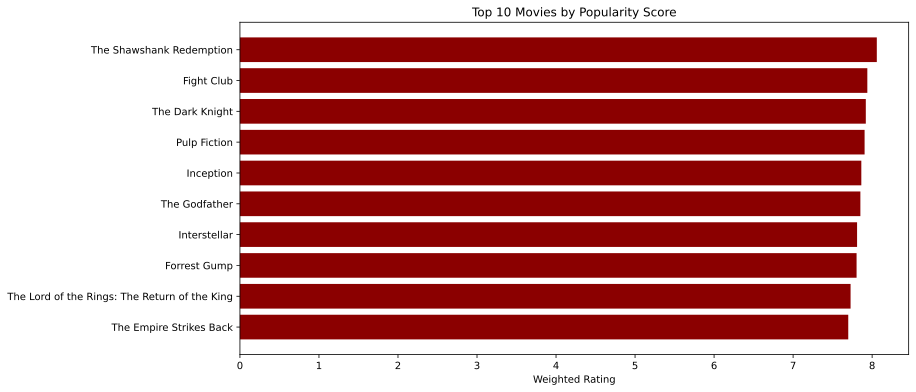

In [11]:
plt.figure(figsize=(12,6))
plt.barh(top_movies["title"], top_movies["weighted_rating"], color='darkred')
plt.xlabel('Weighted Rating')
plt.title('Top 10 Movies by Popularity Score')
plt.gca().invert_yaxis()
plt.savefig('visualisations/popularity_based_filtering.svg')

## Results Interpretation

The horizontal bar chart shows:
- High-weighted ratings require both high vote counts and ratings  
- Classic films like *The Shawshank Redemption* dominate due to strong consensus  
- No personalization - same recommendations for all users  

**Next Steps**: Combine with collaborative/content-based filtering for personalized results.